In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from data_loader import load_house_attributes
from data_sources import source_choice

In [2]:
df = source_choice()

In [3]:
df_paris = load_house_attributes(df)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
df_paris.info()

In [13]:
df_paris.describe()

,Valeur fonciere,Nombre pieces principales,year,months,day
count,1.707380e+05,170738.000000,170738.000000,170738.000000,170738.000000
mean,4.606353e+05,2.267656,2017.953355,6.659490,16.634733
std,3.123788e+05,1.136335,1.369979,3.403966,8.884852
min,1.001000e+03,1.000000,2016.000000,1.000000,1.000000
25%,2.350000e+05,1.000000,2017.000000,4.000000,9.000000
50%,3.800000e+05,2.000000,2018.000000,7.000000,17.000000
75%,6.100000e+05,3.000000,2019.000000,10.000000,25.000000
max,1.500000e+06,20.000000,2020.000000,12.000000,31.000000


In [14]:
df_paris['Commune'].value_counts()

PARIS 18    19784
PARIS 15    18096
PARIS 17    14696
PARIS 11    14213
PARIS 16    13203
PARIS 20    11399
PARIS 19    10513
PARIS 12     9529
PARIS 14     9251
PARIS 10     9231
PARIS 13     8355
PARIS 09     6165
PARIS 05     4309
PARIS 07     3908
PARIS 06     3865
PARIS 03     3754
PARIS 08     3249
PARIS 02     2813
PARIS 04     2684
PARIS 01     1721
Name: Commune, dtype: int64

TypeError: No loop matching the specified signature and casting was found for ufunc add

<Figure size 720x720 with 0 Axes>

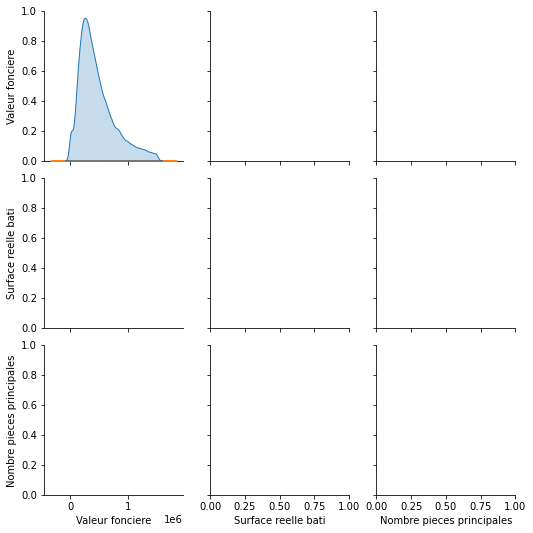

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(df_paris[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

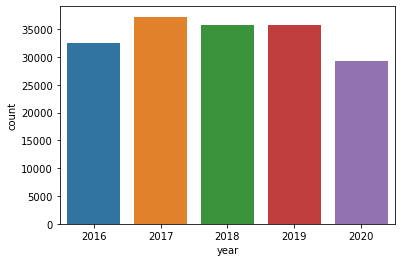

In [16]:
sns.countplot(x="year", data=df_paris)

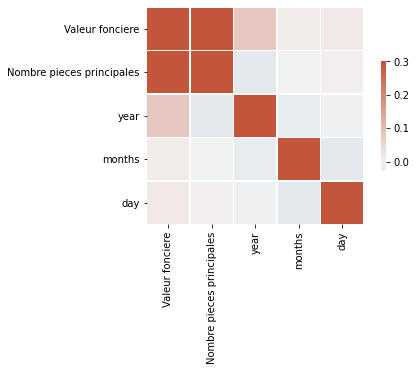

In [17]:
corr = df_paris.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df_paris, test_size=0.2, random_state=42)

In [13]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (136590, 17)
Testing Shape: (34148, 17)


In [14]:
from processing_attributes import process_house_attributes

In [15]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [16]:
train_y = train["Valeur fonciere"] 
test_y = test["Valeur fonciere"] 

In [17]:
from model import regression

In [18]:
regr = regression(train_x, train_y)

months 3.8
day 0.0
No disposition 0.3
Nombre de lots 0.0
Surface reelle bati 0.3
Nombre pieces principales 0.1
Code postal 0.4
Type local 4.6
Section 90.4
Type de voie 0.0


In [19]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (Section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (Section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"

In [20]:
prediction_regr = regr.predict(test_x)
errors_regr = abs(prediction_regr - test_y)
print('Mean Absolute Error regr:', round(np.mean(errors_regr), 2), 'euros.')

Mean Absolute Error regr: 127934.88 euros.


In [21]:
value = round(np.mean(errors_regr), 2)

In [22]:
'''Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)'''

"Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)"